In [3]:
import sys
import time
sys.path.append(r'C:\Users\kid\SynologyDrive\Lab2023\KIDs\QTLab2324\IR_SING_PHOT\Synth')
sys.path.append(r'C:\Users\kid\SynologyDrive\Lab2023\KIDs\QTLab2324\IR_SING_PHOT\Exceptions')
sys.path.append(r'C:\Users\kid\SynologyDrive\Lab2023\KIDs\QTLab2324\IR_SING_PHOT\DAQ')
sys.path.append(r'C:\Users\kid\SynologyDrive\Lab2023\KIDs\QTLab2324\IR_SING_PHOT\API')
sys.path.append(r'C:\Users\kid\SynologyDrive\Lab2023\KIDs\QTLab2324\IR_SING_PHOT\AGI335')
from Continuous_Acquisition import ACQUISITION_CONFIG
import Synthesizer
from logs.logging_config import LOGGING_CONFIG
from logging.config import dictConfig
import logging
import json
from Exceptions import replace_non_serializable
import DAQ
import niscope as ni
import numpy as np
import matplotlib.pyplot as plt
import AGI335

In [4]:
filepath = r'C:\Users\kid\SynologyDrive\Lab2023\KIDs\QTLab2324\IR_SING_PHOT\API'

In [5]:
dictConfig(LOGGING_CONFIG)
logger = logging.getLogger(__name__)
logger.info('START EXECUTION')

12:26:07.045 - __main__ - <module> - INFO - START EXECUTION


In [6]:
try:
    cfg1 = json.dumps(replace_non_serializable(ACQUISITION_CONFIG))
    logger.info('Dumping acquisition configuration')
    with open(ACQUISITION_CONFIG['acq_conf']['path'] + 'config.json','w') as f:
        f.write(cfg1)
except Exception:
    logger.critical('Dumping acquisition configuration')
    raise SystemError("Could not dump acquisition configuration!")

12:26:07.353 - __main__ - <module> - INFO - Dumping acquisition configuration


In [7]:
try:
    daq = DAQ.DAQ()
    logger.info('DAQ class object correctly created')
except Exception:
    logger.critical('Could not crate DAQ class object')
    raise SyntaxError('Could not create DAQ class object')

12:26:07.840 - __main__ - <module> - INFO - DAQ class object correctly created


In [8]:
channels = {'I'			: 0, 
            'Q'			: 1,
            'trigger'	: 1}

In [9]:
devicename =  'PXI1Slot4'

In [10]:
try:
    daq.reset_with_def()
    daq.get_status
    logger.info('Resetting DAQ with defaults')
except Exception:
    logger.error('Could not reset DAQ with defaults')
    pass

12:26:09.160 - __main__ - <module> - ERROR - Could not reset DAQ with defaults


In [11]:
try:
    daq.acq_conf = ACQUISITION_CONFIG['acq_conf']
    logger.info('Inserting acquisition configuration from ACQUISITION_CONFIG dictionary')
except Exception:
    logger.warning('Coulkd not insert acquisition configuration')
    raise SystemError('Coulkd not insert acquisition configuration')

12:26:09.542 - __main__ - <module> - INFO - Inserting acquisition configuration from ACQUISITION_CONFIG dictionary


In [12]:
try:
    daq.horizontal_conf = ACQUISITION_CONFIG['horizontal']
    logger.info('Inserting hconf dic')
except Exception:
    logger.warning('Could not insert hconf dic')
    raise SystemError('Could not insert hconf dic')

12:26:09.885 - __main__ - <module> - INFO - Inserting hconf dic


In [13]:
try:
    daq.vertical_conf = ACQUISITION_CONFIG['vertical']
    logger.info('Inserting vconf dic')
except Exception:
    logger.warning('Could not insert vconf dic')
    raise SystemError('Could not insert vconf dic')

12:26:10.161 - __main__ - <module> - INFO - Inserting vconf dic


In [14]:
try:
    daq.chan_conf = ACQUISITION_CONFIG['chan_conf']
    logger.info('Inserting chan char dic')
except Exception:
    logger.warning('Could not insert chan char dic')
    raise SystemError('Could not insert chan char dic')

12:26:10.480 - __main__ - <module> - INFO - Inserting chan char dic


In [15]:
try:
    daq.trigger_dic = ACQUISITION_CONFIG['trigger']
    logger.info('Inserting trigger dic')
except Exception:
    logger.warning('Could not insert trigger dic')
    raise SystemError('Could not insert trigger dic')

12:26:11.111 - __main__ - <module> - INFO - Inserting trigger dic


In [19]:
s1 = Synthesizer.Synthesizer(2)
s1.connettore()

Synth_due!
Si è connessi al synth_due!


In [42]:
#f0 = 5.345215443088618
f0 = 5.576
span = 1e-1
fs = np.linspace(5,6,10000)

In [43]:
s1.outp_frequency_on()

In [44]:
s1.set_frequency(f0)

In [45]:
data = {'CH0': [],
        'CH1': []   
                }

In [46]:
daq._session = ni.Session(devicename)
daq.config_trigger()
with daq._session as session:
    daq.configure_channels()
    for i,f in enumerate(fs):
        s1.set_frequency(f) # set frequency
        time.sleep(0.1)
        if i%10==0: print(str(i)+'\t'+str(s1.get_frequency()))
        daq._session.initiate()
        waveforms = session.channels[0, 1].fetch()
        data['CH0'].append(np.array(waveforms[0].samples.tolist()).mean())
        data['CH1'].append(np.array(waveforms[1].samples.tolist()).mean()) 

0	5000000000000

10	5001000100010

20	5002000200020

30	5003000300030

40	5004000400040

50	5005000500050

60	5006000600060

70	5007000700070

80	5008000800080

90	5009000900090

100	5010001000100

110	5011001100110

120	5012001200120

130	5013001300130

140	5014001400140

150	5015001500150

160	5016001600160

170	5017001700170

180	5018001800180

190	5019001900190

200	5020002000200

210	5021002100210

220	5022002200220

230	5023002300230

240	5024002400240

250	5025002500250

260	5026002600260

270	5027002700270

280	5028002800280

290	5029002900290

300	5030003000300

310	5031003100310

320	5032003200320

330	5033003300330

340	5034003400340

350	5035003500350

360	5036003600360

370	5037003700370

380	5038003800380

390	5039003900390

400	5040004000400

410	5041004100410

420	5042004200420

430	5043004300430

440	5044004400440

450	5045004500450

460	5046004600460

470	5047004700470

480	5048004800480

490	5049004900490

500	5050005000500

510	5051005100510

520	5052005200520

530	

In [50]:
I = np.array(data['CH0'])
Q = np.array(data['CH1'])
S21 = np.abs(Q+1j*I)
P = np.unwrap(np.angle(Q+1j*I))
T = [i for i in range(len(np.array(data['CH1'])))]

Text(0, 0.5, '$\\Phi$ [rad]')

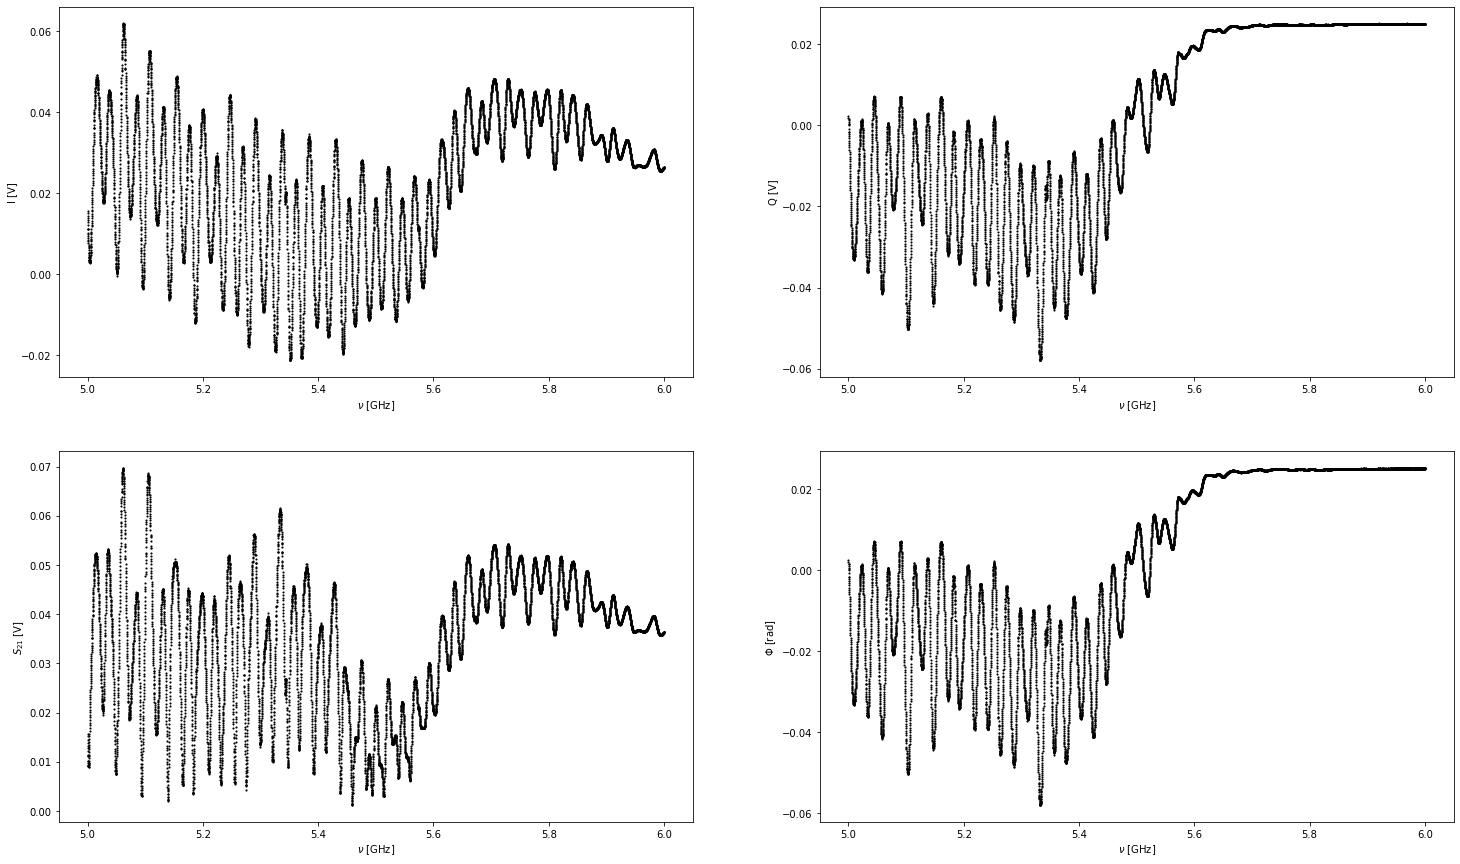

In [54]:
fig, axs = plt.subplots(2, 2, figsize=(25,15))
axs[0][0].scatter(fs, I, marker='.',s=5,color='black')
axs[0][0].set_xlabel(r'$\nu$ [GHz]')
axs[0][0].set_ylabel(r'I [V]')
axs[0][1].scatter(fs, Q, marker='.',s=5,color='black')
axs[0][1].set_xlabel(r'$\nu$ [GHz]')
axs[0][1].set_ylabel(r'Q [V]')


axs[1][0].scatter(fs, S21, marker='.',s=5,color='black')
axs[1][0].set_xlabel(r'$\nu$ [GHz]')
axs[1][0].set_ylabel(r'$S_{21}$ [V]')
axs[1][1].scatter(fs, Q, marker='.',s=5,color='black')
axs[1][1].set_xlabel(r'$\nu$ [GHz]')
axs[1][1].set_ylabel(r'$\Phi$ [rad]')
#axs[0].set_xlim([5.5604,5.60])